Run locally or <a target="_blank" href="https://colab.research.google.com/github/aalgahmi/dl_handouts/blob/main/06.more_on_training_deep_neural_networks.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.random.manual_seed(17);

# More on training deep neural networks (DNNs)
Training deep neural networks (DNNs) can be challenging for several reasons. They require significant computational power and can take a long time to train, especially when working with large datasets. They can be complex, and their results can be difficult to interpret or explain. Moreover, DNNs typically have a large number of parameters, which can lead to overfitting if the model is not properly regularized.

However, with proper planning, resources, and expertise, it is possible to overcome these challenges and develop high-performing models that can solve complex problems. The following are some common techniques used to alleviate these challenges and make training deep networks feasible. First, we will discuss these techniques used in training DNNs, and then we will provide examples to illustrate how many of them are implemented.

## Activation functions

Activation functions in neural networks serve a crucial role. They introduce non-linearity into the network, which is essential for the neural network to learn and approximate complex mappings between inputs and outputs. These functions are applied to the output of each neuron on the hidden layers, depending on the learning task, to the output of the neuron of the output layer as well.

Initially the sigmoid function was used, but it did not work well. Nowadays we have many activation functions as you can see from the figure below. The choice of activation function depends on the nature of the problem, the characteristics of the data, and the specific requirements of the neural network architecture.

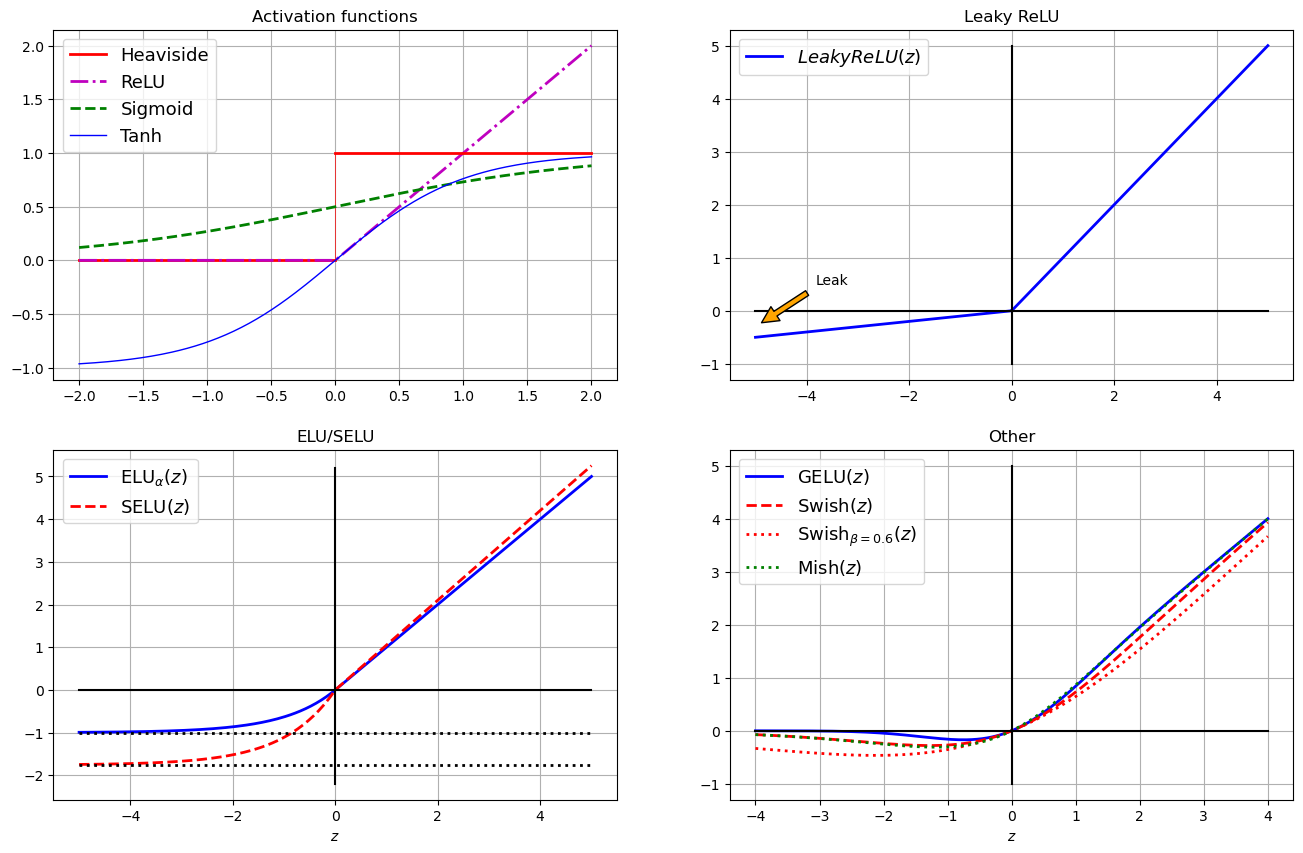

In [2]:
z = torch.linspace(-2, 2, 200)

# 1
fig = plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)

plt.plot([-2, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, F.relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, 2], [1, 1], "r-", linewidth=2)
plt.plot(z, F.sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, F.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.legend(loc="best", fontsize=13)

# 2
plt.subplot(2, 2, 2)

z = torch.linspace(-5, 5, 200)
plt.plot(z, F.leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 5], 'k-')
plt.grid()
props = dict(facecolor='orange', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props, ha="center")

plt.title("Leaky ReLU")
plt.legend(loc="best", fontsize=13)

# 3
plt.subplot(2, 2, 3)

z = torch.linspace(-5, 5, 200)
plt.plot(z, F.elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z)$")
plt.plot(z, F.selu(z), "r--", linewidth=2, label=r"SELU$(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 5.2], 'k-')
plt.grid()
plt.xlabel("$z$")
plt.legend(loc="best", fontsize=13)
plt.title("ELU/SELU")

# 4
plt.subplot(2, 2, 4)

z = torch.linspace(-4, 4, 200)
plt.plot(z, F.gelu(z), "b-", linewidth=2, label=r"GELU$(z)$")
plt.plot(z, z * F.sigmoid(z), "r--", linewidth=2, label=r"Swish$(z)$")
plt.plot(z, z * F.sigmoid(.6 * z), "r:", linewidth=2, label=fr"Swish$_{{\beta={.6}}}(z)$")
plt.plot(z, F.mish(z), "g:", linewidth=2, label=fr"Mish$(z)$")
plt.plot([-4, 4], [0, 0], 'k-')
plt.plot([0, 0], [-1, 5], 'k-')
plt.grid()
plt.xlabel("$z$")
plt.legend(loc="best", fontsize=13)
plt.title("Other")
plt.show()

In PyTorch, activations can be applied using both `torch.nn` module and `torch.nn.functional` module. The choice between the two depends on whether you are working with layers (modules) or functional operations.

* **`torch.nn` Module (Layers):** Use `torch.nn` module when you are working with layers (modules) that maintain internal state, such as trainable parameters (weights and biases).
   - These layers are instances of classes and inherit from `nn.Module`.
   - Examples include `nn.ReLU`, `nn.Sigmoid`, `nn.Tanh`, etc.


In [3]:
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)

* **`torch.nn.functional` Module (Functional Operations):** Use `torch.nn.functional` module when you are applying activations as functional operations without maintaining any internal state.
   - These operations are stateless and are applied to tensors directly.
   - Examples include `F.relu`, `F.sigmoid` (which is equivalent to `F.sigmoid`), `F.tanh`, etc.

In [4]:
x = torch.randn(10, 5)
y = F.relu(x)

In summary:
* If you are defining a neural network architecture using `nn.Module` and stacking layers, it's common to use the activations from `torch.nn`.
* If you are applying activations within the forward pass of a custom neural network class, you can use either `torch.nn` or `torch.nn.functional`, but using `torch.nn` is more common.
* If you are performing activations as part of a more complex functional operation outside the scope of a neural network class, you might prefer using `torch.nn.functional` for a more functional programming style.

In practice, both approaches are commonly used, and the choice often depends on personal preference and the context in which the activation functions are applied.

## Weight initialization
In PyTorch, weight initialization is a crucial step in training neural networks. Proper initialization can significantly impact the convergence and performance of the model. PyTorch provides several methods for weight initialization through its `torch.nn.init` module. Given a tensor such as the following:

In [5]:
t = torch.ones(3, 8, dtype=torch.float)
t

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

* **Zero Initialization (`torch.nn.init.zeros_`):** Initializes weights with zeros. It's not a common choice, as it might lead to symmetry problems.

In [6]:
nn.init.zeros_(t)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

* **Normal Distribution Initialization (`torch.nn.init.normal_`):** Initializes weights from a normal distribution with a given mean and standard deviation.


In [7]:
nn.init.normal_(t, mean=0, std=1)

tensor([[-0.3565,  0.0338,  0.1462, -0.1896, -0.4125,  1.2291, -0.2033, -1.4571],
        [-1.6969, -1.1887,  0.4482,  0.3913,  0.6747,  0.5707, -0.1229, -0.9327],
        [-0.0173,  1.2792,  0.1500, -0.8990, -0.3292,  2.7652, -1.8251,  0.5382]])

* **Xavier/Glorot Initialization (`torch.nn.init.xavier_uniform_` or `torch.nn.init.xavier_normal_`):** Works well with activation functions like tanh or sigmoid. It initializes weights based on the number of input and output units.

In [8]:
print("Uniform: ", nn.init.xavier_uniform_(t, gain=1))
print("Normal: ", nn.init.xavier_normal_(t, gain=1))

Uniform:  tensor([[-0.6759, -0.5070, -0.5988,  0.5102,  0.0654, -0.6441, -0.2224, -0.4738],
        [-0.6866,  0.5083, -0.5489,  0.5148, -0.0364, -0.7175, -0.6707,  0.5542],
        [-0.0288,  0.6347, -0.0955, -0.4210, -0.3183,  0.0366,  0.3921,  0.0277]])
Normal:  tensor([[-0.4330, -0.2792,  0.3632, -0.0202,  0.5565,  0.0407, -0.8228, -0.1821],
        [-0.1079, -0.9710,  1.1922, -0.6336, -0.0662, -0.1530,  0.4879, -0.0506],
        [-0.8163,  0.1748,  0.1790,  0.2078,  0.5676, -0.2713,  0.0336,  0.2344]])


* **He Initialization (`torch.nn.init.kaiming_uniform_` or `torch.nn.init.kaiming_normal_):** Similar to Xavier initialization but for ReLU activation functions.

In [9]:
print("Uniform: ", nn.init.kaiming_uniform_(t, a=0, mode='fan_in', nonlinearity='relu'))
print("Normal: ", nn.init.kaiming_normal_(t, a=0, mode='fan_in', nonlinearity='relu'))

Uniform:  tensor([[-0.6473, -0.4419, -0.6499,  0.7196, -0.6741, -0.7130,  0.4730, -0.0739],
        [-0.1293,  0.1919, -0.3975, -0.1189, -0.7962, -0.7615, -0.3205,  0.8358],
        [ 0.8244, -0.0622, -0.8267, -0.2223, -0.1702, -0.3853, -0.2513, -0.5212]])
Normal:  tensor([[-0.3937, -0.8733,  0.1550,  0.3536,  0.5522, -0.2707,  0.7989,  0.2079],
        [-0.1500,  0.2378, -0.8853,  0.6998,  0.6039, -0.3512, -0.3155, -0.1595],
        [-0.5710, -0.1843,  0.2930, -0.4059, -0.5235,  0.2577,  0.5390, -0.3260]])


Notice use of the `a=0` argument which is set to a non-zero value if the activation is `leaky_relu`.

Typically we apply these initializations (based on the activation functions) to the weights of the model. More information about these initializations can be found at the [nn.init documentation page](https://pytorch.org/docs/stable/nn.init.html). 

## Regularization
Overfitting is a a major challenge to training deep neural networks and occurs when the model becomes too complex and starts to memorize the training data instead of generalizing to new examples. L1 and L2 regularization are commonly applied to neural network models to prevent overfitting. Dropout is anohter powerfull regularization technique.

### L1 Regularization:
L1 regularization can be implemented by adding a term to the loss function that penalizes the absolute values of the weights. This additional term encourages sparsity in the weights, promoting simpler models. Here's how you can implement L1 regularization in PyTorch using a simple toy model:

```python
class A_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=8, out_features=10)

        nn.init.zeros_(self.fc.bias)
        nn.init.xavier_uniform_(self.fc.weight, gain=1)

    def forward(self, x):
        return nn.functional.sigmoid(self.fc(x))
        
model = A_Model()

l1_lambda = 0.01 # A hyper-parameter

l1_regularization = torch.tensor(0., requires_grad=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for inputs, targets in dataloader:
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)

    # Calculate L1 regularization term
    for param in model.parameters():
        l1_regularization += torch.norm(param, 1)

    # Add L1 regularization to the loss
    loss += l1_lambda * l1_regularization

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

In the above example:

* `l1_lambda` is the regularization strength, a hyperparameter.
* `l1_regularization` is a tensor to store the cumulative L1 regularization term.
* The loop through the parameters calculates the L1 norm (sum of absolute values) for each parameter.
* The L1 regularization term is added to the loss function before backpropagation.

### L2 Regularization:
L2 regularization, also known as **weight decay**, is more common can be implemented manually be adding a regularization term to the loss in the same way as the L1 example above.

```python
model = A_Model()

l2_lambda = 0.01

l2_regularization = torch.tensor(0., requires_grad=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for inputs, targets in ds_train:
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)

    # Calculate L2 regularization term
    for param in model.parameters():
        l2_regularization += torch.norm(param, 2)

    # Add L2 regularization to the loss
    loss += 0.5 * l2_lambda * l2_regularization.pow(2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

More conveniently, you can use the `weight_decay=` argument in the optimizer to apply L2 regularization directly during optimization. In other words:

```python
l2_lambda = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=l2_lambda)
```

### Dropout

Dropout is a regularization technique that involves randomly setting a fraction of the activations of a neural network to zero during training (and only training). This forces the network to learn multiple representations of the data and be more resilient, which helps to improve its generalization ability. Introduced by Geoffrey Hinton et al in their paper titled "Improving neural networks by preventing co-adaptation of feature detectors," dropout has become a widely adopted method in deep learning.

Dropout is typically applied to the hidden layers, not the output layer. The rate of dropout is a hyperparameter that controls the fraction of activations that are dropped. A common dropout rate is 0.5, meaning that each activation has a 50% chance of being dropped.

In PyTorch, we can use the `torch.nn.Dropout` module to implement dropout in your neural network. Here's a simple example of how it is used:

```python
class B_Model(nn.Module):
    def __init__(self, drop_rate=0.5):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.dropout = nn.Dropout(p=drop_rate)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
```

It's imperative to keep in mind that during the forward pass, dropout is applied only when the model is in `training` mode (which can be set using `model.train()`). When you want to evaluate the model or make predictions with it, you need to set its mode to `evaluation` using `model.eval()`, which will turn off dropout.

## Batch Normalization

Batch Normalization (BatchNorm) is a technique used in neural networks to improve training stability and speed up convergence. It was introduced by Sergey Ioffe and Christian Szegedy in their paper titled **Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift.** Internal Covariate Shift refers to the change in the distribution of internal activations of a neural network's layers during training. As the parameters of the earlier layers are updated, the distribution of inputs to subsequent layers shifts, making it more challenging for the network to learn. BatchNorm aims to mitigate this problem as follows:

* The inputs to a layer are normalized by subtracting the mean and dividing by the standard deviation of the mini-batch. This normalizes the activations, bringing them to a more standard scale.

* Two learnable parameters per feature per layer are introduced: a scale (gamma) and an offset (beta). These parameters allow the model to adapt the normalized values to the specific requirements of the task.

BatchNorm is an example of a layer that behaves differently during training from how it behaves during testing. The mean and standard deviation are calculated for each feature independently over the mini-batch during training. In validation or testing, the running average of the mean and standard deviation computed during training is used.

Some advantages of Batch Normalization include:

* allowing for higher learning rates, speeding up the convergence of the training process.

* reducing the sensitivity of the model to the choice of weight initialization.

* often resulting in better generalization performance on validation and test sets.

In PyTorch, Batch Normalization is implemented through the `torch.nn.BatchNorm1d`, `torch.nn.BatchNorm2d`, and `torch.nn.BatchNorm3d` modules, depending on the dimensionality of the input data. The `BatchNorm1d` module is used for 1D data (e.g., in fully connected layers), `BatchNorm2d` for 2D data (e.g., in convolutional layers), and `BatchNorm3d` for 3D data.

Usually BatchNorm layers are used before the activation function. We will see an example later in this notebook and in upcoming handouts.
You can find more details about the BatchNorm modules and their parameters in the [official PyTorch documentation](https://pytorch.org/docs/stable/nn.html#normalization-layers).

## Fast optimizers

PyTorch provides a variety of optimization algorithms, often referred to as optimizers, that can be used to train neural networks. These optimizers are part of the `torch.optim` module. Here are some of the commonly used optimizers provided by PyTorch:

* **Stochastic Gradient Descent (SGD):** Implements the basic stochastic gradient descent optimization algorithm.

   ```python
   optimizer = optim.SGD(model.parameters(), lr=0.01)
   ```

* **RMSprop:** Root Mean Square Propagation adapts the learning rates using the moving average of squared gradients.

   ```python
   optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
   ```

* **Adam:** Adaptive Moment Estimation combines ideas from Adagrad and RMSprop, adapting the learning rates and incorporating momentum.

   ```python
   optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
   ```
   
* **Adagrad:** Adapts the learning rates for each parameter based on the historical gradients.

   ```python
   optimizer = optim.Adagrad(model.parameters(), lr=0.01)
   ```
* **Adadelta:** An extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate.

   ```python
   optimizer = optim.Adadelta(model.parameters(), lr=1.0, rho=0.9)
   ```

* **AdamW:** An optimized version of Adam that includes weight decay.

   ```python
   optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
   ```
Here is a full list of the optimizers provided by PyTorch.

In [10]:
[optimizer for optimizer in dir(torch.optim) if optimizer[0].isupper()]

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam']

The choice of optimizer often depends on the characteristics of the problem and the dataset. Additionally, learning rate scheduling can be applied in combination with these optimizers to improve convergence during training.

## Learning rate scheduling

Learning rate scheduling is a technique used in training machine learning models, including neural networks, where the learning rate (the step size during optimization) is adjusted over time during training. The goal is to improve convergence, speed up training, and potentially enhance the final performance of the model. The learning rate is a hyperparameter that determines the size of the steps taken during the optimization process.

There are various strategies for learning rate scheduling, and they can be broadly categorized into two types: fixed and adaptive.

* **Fixed Learning Rate:** In a fixed learning rate strategy, the learning rate remains constant throughout the entire training process. This is what we have been doing so far. It is simple and easy to implement, but it may not be optimal for the entire training duration, especially when approaching convergence.

* **Adaptive Learning Rate:** Adaptive learning rate strategies dynamically adjust the learning rate based on the training progress, performance, or other factors. Common adaptive learning rate methods include:

  - **Step Decay:** The learning rate is reduced by a factor after a fixed number of training epochs or steps.
      
  - **Exponential Decay:** The learning rate is decayed exponentially over time, reducing it by a factor at each epoch or step.

  - **Cosine Annealing:** The learning rate follows a cosine function, cycling between a maximum and minimum value.
      
  - **Inverse Square Root Decay:** The learning rate is scaled by the inverse square root of the step or epoch number.

These are just a few examples. The choice of strategy often depends on the specific characteristics of the problem, the dataset, and the model architecture. Experimentation is essential to determine the most effective learning rate scheduling strategy for a specific problem.

Under `torch.optim.lr_scheduler`, PyTorch provides various scheduling strategies. These strategies can be used in conjunction with PyTorch optimizers to adjust the learning rates during training. Here is the list of strategies provided by PyTorch: 

In [11]:
[strategy for strategy in dir(torch.optim.lr_scheduler) if strategy[0].isupper()]

['ChainedScheduler',
 'ConstantLR',
 'CosineAnnealingLR',
 'CosineAnnealingWarmRestarts',
 'Counter',
 'CyclicLR',
 'EPOCH_DEPRECATION_WARNING',
 'ExponentialLR',
 'LRScheduler',
 'LambdaLR',
 'LinearLR',
 'MultiStepLR',
 'MultiplicativeLR',
 'OneCycleLR',
 'Optimizer',
 'PolynomialLR',
 'ReduceLROnPlateau',
 'SequentialLR',
 'StepLR']

And here's an example of how a learning rate scheduling strategy is used in PyTorch:

```python
model = A_Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define a learning rate scheduling strategy
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
for epoch in range(num_epochs):
    # Training steps...
    
    # Adjust learning rate
    scheduler.step()
```

In this example, the learning rate is scheduled to decrease by a factor of 0.1 every 10 epochs. This approach involves initiating training with a relatively large learning rate to expedite the initial stages, gradually reducing it over time to ensure a more refined adjustment of parameters and achieve convergence.


More information about optimizers and learning rate schedulers can be found at the [`torch.optim` documentation page](https://pytorch.org/docs/stable/optim.html)

# Regression and classification examples using DNNs

In this section, we apply our newly acquired PyTorch knowledge and skills through two illustrative examples: predicting housing prices and classifying the Fashion MNIST dataset. Both examples are designed to reinforce our understanding of PyTorch and the process of training neural networks.

## Example 1: Predicting housing prices

For this example, we will be using the California housing dataset, which we can download from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or get through SciKit Learn. We'll use the latter to fetch this data:

In [12]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

This dataset has 8 input features:

In [13]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

It also has one target column:

In [14]:
california_housing.target_names

['MedHouseVal']

Let's split the data into three sets:

In [15]:
from sklearn.model_selection import train_test_split

input, target = (
    torch.tensor(california_housing.data, dtype=torch.float),
    torch.tensor(california_housing.target.reshape(-1, 1), dtype=torch.float)
)

X_rest, X_test, y_rest, y_test = train_test_split(input, target)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([11610, 8]),
 torch.Size([11610, 1]),
 torch.Size([3870, 8]),
 torch.Size([3870, 1]),
 torch.Size([5160, 8]),
 torch.Size([5160, 1]))

**IMPORTANT**: While we are used to the target data to be a one-dimensional array, it is important to make it two-dimensional in PyTorch. That is why we used `california_housing.target.reshape(-1, 1)` in the cell above.

### Creating the training dataset and data loader

Next we create a PyTorch dataset and data loader for training.

In [16]:
from torch.utils.data import TensorDataset

ds_train = TensorDataset(X_train, y_train)
len(ds_train)

11610

And we create a data loader for training:

In [17]:
from torch.utils.data import DataLoader
dl_train = DataLoader(ds_train, batch_size=64, shuffle=True)

### Normalizing the data
Next, we normalize (or standardize) the input data, and we can do that in one of two ways:

* Manually by calculating the mean and standard deviation of the training set and using that to normalize all three sets.
* Using a custom `Normalization` layer added at the beginning of the model.

Let's do the latter. First we use the training (why?) data to calculate the mean and standard deviation needed for such normalization.

In [18]:
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
mean, std

(tensor([ 3.8715e+00,  2.8599e+01,  5.4037e+00,  1.0929e+00,  1.4459e+03,
          3.0487e+00,  3.5622e+01, -1.1956e+02]),
 tensor([1.9209e+00, 1.2614e+01, 2.1037e+00, 3.7610e-01, 1.1540e+03, 7.3330e+00,
         2.1338e+00, 2.0076e+00]))

We can, now, create a normalization layer (module). This is a simple class that inherits from `nn.Module` and implements both `___init__()` and `forward()`.

In [19]:
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super().__init__()
        
        self.mean = mean
        self.std = std

    def forward(self, x):
        return (x - self.mean) / self.std  

### Building the model

We can build a model using the sequential module or by subclassing `nn.Module`. Here is what a sequential model looks like. This is a model with two hidden layers (each with 128 units) and one output layer.

In [20]:
model = nn.Sequential(
        Normalization(mean, std),
        nn.Linear(8, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 1),
    )

from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Normalization: 1-1                     --
├─Linear: 1-2                            1,152
├─ReLU: 1-3                              --
├─Linear: 1-4                            16,512
├─ReLU: 1-5                              --
├─Linear: 1-6                            129
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0

Here is a plot of this model:

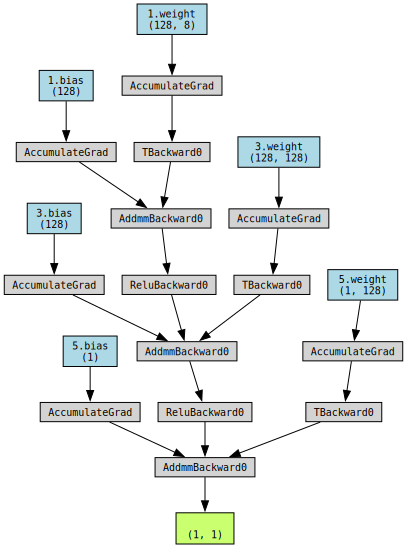

In [21]:
from torchviz import make_dot
make_dot(model(ds_train[0][0].unsqueeze(dim=0)), params=dict(model.named_parameters()))

### Training the model

We start by specifying the loss function and ther optimizer we'll use for training. This is a regression problem, and we could use either the mean squared error or the mean absolute error for loss. We'll use the mean absolute error, which in PyTorch is `nn.L1Loss()`. Let's use the Adam optimizer.

In [22]:
loss_fn = nn.L1Loss()
optimizer =  torch.optim.Adam(model.parameters(), lr = 0.001) 

Here is the training loop:

In [23]:
epochs = 100
hist = dict(loss=[[]] * epochs, val_loss= [0] * epochs)

for epoch in range(epochs):
    for x_batch, y_batch in dl_train:        
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        hist['loss'][epoch].append(loss.item())

    hist['loss'][epoch] = sum(hist['loss'][epoch]) / len(hist['loss'][epoch])
    hist['val_loss'][epoch] = loss_fn(model(X_val), y_val).item()

    if epoch == 0 or (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1: 4d}: loss={hist['loss'][epoch]:.4f}\tval_loss={hist['val_loss'][epoch]:.4f}")


Epoch    1: loss=0.6453	val_loss=0.4727
Epoch   10: loss=0.4256	val_loss=0.3747
Epoch   20: loss=0.3896	val_loss=0.3634
Epoch   30: loss=0.3716	val_loss=0.3722
Epoch   40: loss=0.3601	val_loss=0.3393
Epoch   50: loss=0.3519	val_loss=0.3406
Epoch   60: loss=0.3454	val_loss=0.3405
Epoch   70: loss=0.3401	val_loss=0.3356
Epoch   80: loss=0.3356	val_loss=0.3352
Epoch   90: loss=0.3318	val_loss=0.3467
Epoch  100: loss=0.3284	val_loss=0.3414


Here are training curves:

<Axes: >

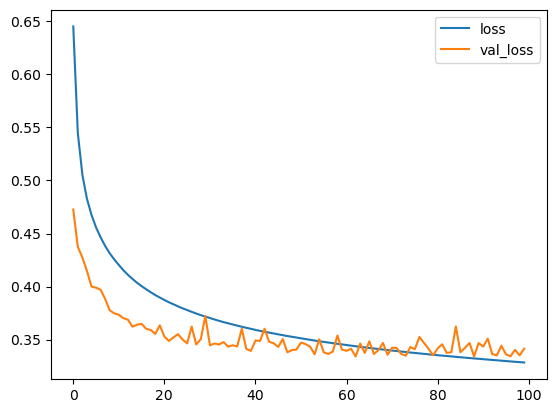

In [24]:
pd.DataFrame(hist).plot()

### Evaluating the model

Having trained this model, let's evaluate it using the training dataset. Again, we can obtain predictions by calling the model, as if it were a function, on the testing set.

In [25]:
y_pred = model(X_test)

To get a measure of how well this model performs, we plot actual prices against predicted prices. A well-performing model will have the points on or near the diagonal line passing through the points (0, 0) and (1, 1).

Text(0, 0.5, 'Predicted prices')

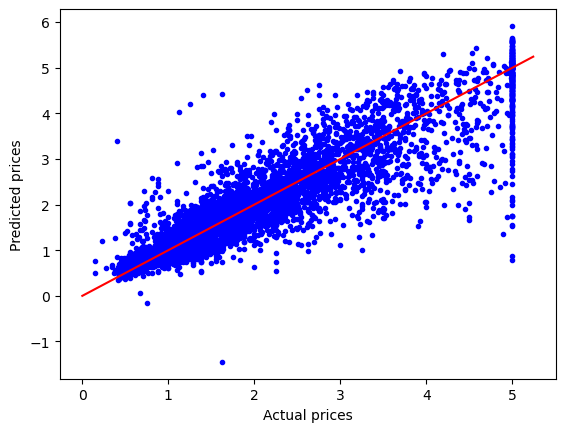

In [26]:
plt.plot(y_test, y_pred.detach(), 'b.')
xmin, xmax = plt.xlim()
plt.plot([0, xmax], [0, xmax], 'r')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices') 

And here is the testing mean absolute error

In [27]:
mae = loss_fn(y_pred, y_test)
print(f"MSE: {mae}")

MSE: 0.34000158309936523


## Example 2: Classifying the Fashion MNIST dataset

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The categories are:

| Label | Description |
| ----- | ----------- |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

### Downloading the dataset

We'll use the `torchvision.datasets` package to fetch the `FashionMNIST` data. This will download the data into your provided `data_path`, package the data into a dataset, and optionally pass it through certain transformations. This dataset has only two porions: a training set (`train=True`) and a testing set (`test=True`). We will need to split the training set further to allow for a validation set.

In [28]:
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import random_split

data_path = './datasets'

ds_rest = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
ds_train, ds_val = random_split(ds_rest, [.8, .2])
ds_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

len(ds_train), len(ds_val), len(ds_test)

(48000, 12000, 10000)

Notice the use of `transforms.ToTensor()`. This is a transformation meant to convert the images to tensors before being packaged into datasets. Let's plot couple of these images.

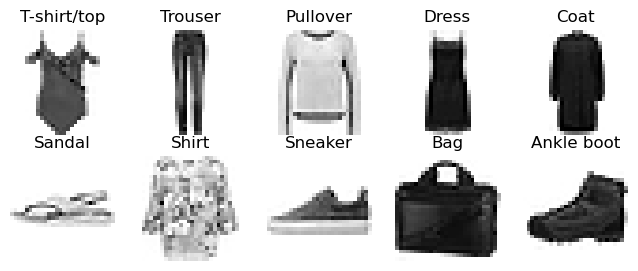

In [29]:
from PIL import Image

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

fig = plt.figure(figsize=(8, 3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in ds_train if label == i)
    img = Image.fromarray(np.uint8(img.squeeze() * 255))
    plt.imshow(img, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.show()

And here is an image tensor looks like:

In [30]:
ds_train[99][0].shape

torch.Size([1, 28, 28])

This is the (C, H, W) layout with a single color channel, 28-pixel height, and 28-pixel-width. Let's create the data loaders:

In [31]:
dl_train = DataLoader(ds_train, batch_size=32, shuffle=True, num_workers=2)
dl_val = DataLoader(ds_val, batch_size=32, shuffle=False, num_workers=2)
dl_test = DataLoader(ds_test, batch_size=32, shuffle=False, num_workers=2)

For better performance, we only set the training loader to `shuffle=True`, and we set the number of workers (sub-processes used to load the data) to 2, instead of the default 0 (indicating the data is to be loaded by the main process).

### Building the model

We are now ready to build a model. We'll do that by subclassing the `nn.Module` class. 

In [32]:
class FashionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flaten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        nn.init.zeros_(self.fc1.bias)
        nn.init.kaiming_normal_(self.fc1.weight, a=0, mode='fan_in', nonlinearity='relu')
        
        self.fc2 = nn.Linear(256, 128)
        nn.init.zeros_(self.fc2.bias)
        nn.init.kaiming_normal_(self.fc2.weight, a=0, mode='fan_in', nonlinearity='relu')
        
        self.out = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.flaten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

model = FashionModel()

As you can see, the model starts with an `nn.Flatten()` layer that converts an image from a (1, 28, 28) layout to a (1, 784) layout. The output layer has 10 units: one for each of the target classes. Let's summarize and plot the model. Notice how the parameters of these layers are initialized.

In [33]:
summary(model)

Layer (type:depth-idx)                   Param #
FashionModel                             --
├─Flatten: 1-1                           --
├─Linear: 1-2                            200,960
├─Linear: 1-3                            32,896
├─Linear: 1-4                            1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0

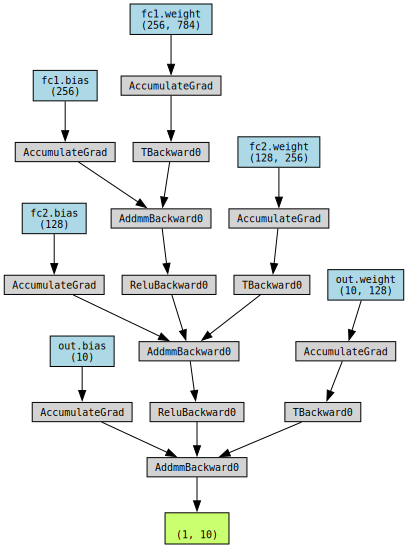

In [34]:
make_dot(model(ds_train[0][0].unsqueeze(dim=0)), params=dict(model.named_parameters()))

### Training the model
For a classification problem like this, we'll use the `nn.CrossEntropyLoss()` loss function. We'll use SGD for optimizer with weight decay (L2 regularization).

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

Here is the training loop with both a training step and a validation setp.

In [36]:
epochs = 10
hist = dict(loss=[0] * epochs, accuracy=[0] * epochs, val_loss=[0] * epochs, val_accuracy=[0] * epochs)

for epoch in range(epochs):
    for x_batch, y_batch in dl_train:
        # Training step
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        hist['loss'][epoch] += loss.item()
        hist['accuracy'][epoch] += (torch.argmax(pred, dim=1) == y_batch).float().sum().item()

    with torch.no_grad():
        for x_batch, y_batch in dl_val:
            # Validation step
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)

            hist['val_loss'][epoch] += loss.item()
            hist['val_accuracy'][epoch] += (torch.argmax(pred, dim=1) == y_batch).float().sum().item()
    hist['loss'][epoch] /= len(dl_train)
    hist['accuracy'][epoch] /= len(dl_train.dataset)
    
    hist['val_loss'][epoch] /= len(dl_val)
    hist['val_accuracy'][epoch] /= len(dl_val.dataset)

    print(f"Epoch {epoch + 1: 4d}: loss={hist['loss'][epoch]:.4f}\taccuracy={hist['accuracy'][epoch]:.4f} \
        val_loss={hist['val_loss'][epoch]:.4f}\tval_accuracy={hist['val_accuracy'][epoch]:.4f}")

Epoch    1: loss=1.8907	accuracy=0.4345         val_loss=1.4392	val_accuracy=0.6051
Epoch    2: loss=1.1716	accuracy=0.6608         val_loss=0.9858	val_accuracy=0.6806
Epoch    3: loss=0.9026	accuracy=0.6959         val_loss=0.8325	val_accuracy=0.7143
Epoch    4: loss=0.7956	accuracy=0.7279         val_loss=0.7584	val_accuracy=0.7406
Epoch    5: loss=0.7340	accuracy=0.7506         val_loss=0.7098	val_accuracy=0.7597
Epoch    6: loss=0.6913	accuracy=0.7671         val_loss=0.6711	val_accuracy=0.7775
Epoch    7: loss=0.6584	accuracy=0.7783         val_loss=0.6425	val_accuracy=0.7860
Epoch    8: loss=0.6322	accuracy=0.7877         val_loss=0.6217	val_accuracy=0.7930
Epoch    9: loss=0.6117	accuracy=0.7958         val_loss=0.6032	val_accuracy=0.7983
Epoch   10: loss=0.5946	accuracy=0.8033         val_loss=0.5864	val_accuracy=0.8079


Here are the learning curves:

array([[<Axes: >, <Axes: >]], dtype=object)

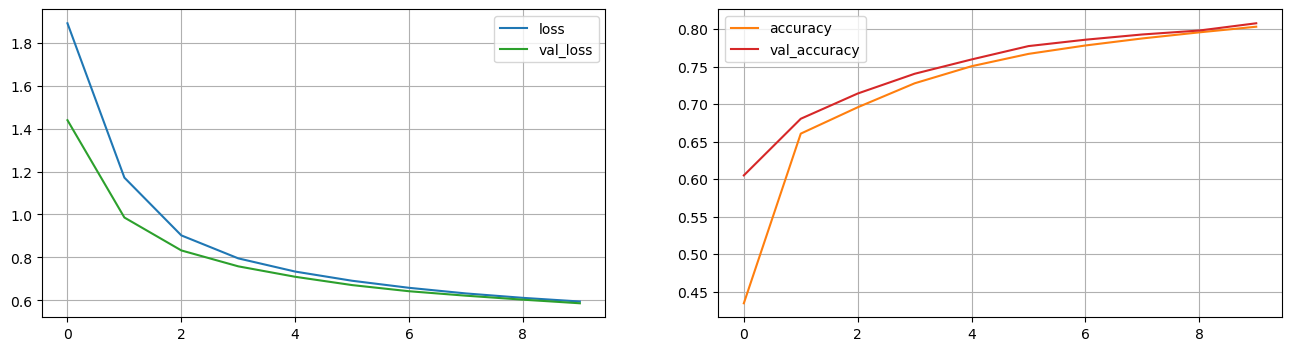

In [37]:
pd.DataFrame(hist).plot(subplots=[('loss', 'val_loss'), ('accuracy', 'val_accuracy')], 
                        layout=(1,2), figsize=(16,4), grid=True)

### Evaluating the model
First we get retrieve the input and output tensors from the training dataset. This is because, the model only accepts tensors as input.

In [38]:
X_test, y_test = torch.stack([x for x, _ in ds_test]).squeeze(), torch.stack([torch.tensor(y) for _, y in ds_test])
X_test.shape, y_test.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

Here are the model predictions:

In [39]:
_, preds = torch.max(model(X_test), dim=1)
preds.shape

torch.Size([10000])

Here are accuracy and confusion matrix.

In [40]:
from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, preds)}")

Accuracy: 0.7941


Alternatively, the model can be evaluated like this:

In [41]:
acc = 0.0

for x_batch, y_batch in dl_test:
    pred = model(x_batch)
    acc += (torch.argmax(pred, dim=1) == y_batch).float().sum().item()

acc /= len(dl_test.dataset)
print("Accuracy:", acc)

Accuracy: 0.7941


### Improving the model with batch normalization

Let's improve the above model by adding batch normalization

In [42]:
class FashionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

model = FashionModel()

As you can see, the BatchNorm layers are applied after Linear but before ReLU. They also have their own training parameters which you can see if you summarize the model.

In [43]:
summary(model)

Layer (type:depth-idx)                   Param #
FashionModel                             --
├─Sequential: 1-1                        --
│    └─Flatten: 2-1                      --
│    └─Linear: 2-2                       200,960
│    └─BatchNorm1d: 2-3                  512
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       32,896
│    └─BatchNorm1d: 2-6                  256
│    └─ReLU: 2-7                         --
│    └─Dropout: 2-8                      --
│    └─Linear: 2-9                       1,290
Total params: 235,914
Trainable params: 235,914
Non-trainable params: 0

Let's plot the model:

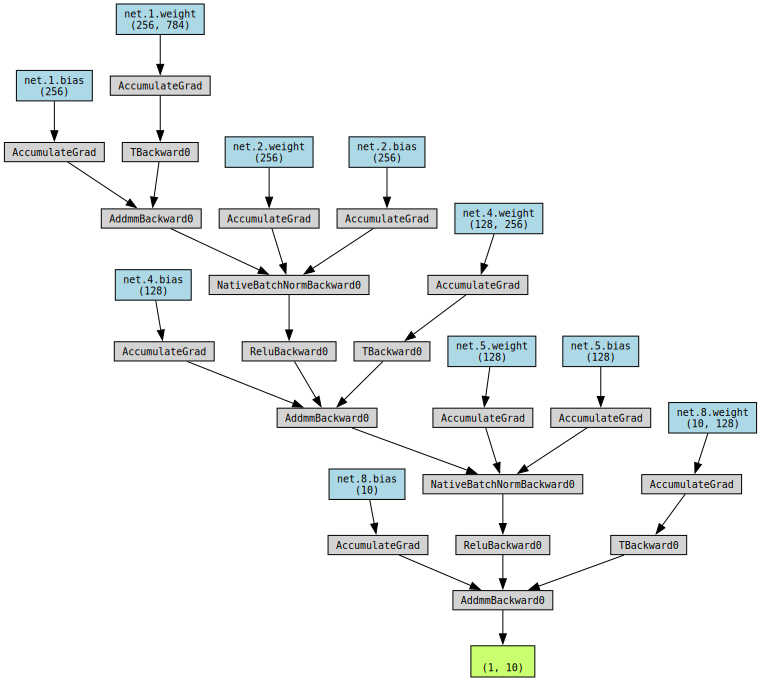

In [44]:
model.eval()
make_dot(model(ds_train[0][0].unsqueeze(dim=0)), params=dict(model.named_parameters()))

Notice the call `model.eval()` at the top of the above cell. It sets the mode of the model to evaluation instead of training (which is the default). This is important for models like this with layers such as BatchNorm or Dropout that behave differently during training and evaluation.

Let's set the loss function and optimizer.

In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

Here is the training loop with the training step running under the training mode (`model.train()`) and the validation setp running under the evaluation mode (`model.eval()`).

In [46]:
epochs = 10
hist = dict(loss=[0] * epochs, accuracy=[0] * epochs, val_loss=[0] * epochs, val_accuracy=[0] * epochs)

for epoch in range(epochs):
    model.train()
    for x_batch, y_batch in dl_train:
        # Training step
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        hist['loss'][epoch] += loss.item()
        hist['accuracy'][epoch] += (torch.argmax(pred, dim=1) == y_batch).float().sum().item()

    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in dl_val:
            # Validation step
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)

            hist['val_loss'][epoch] += loss.item()
            hist['val_accuracy'][epoch] += (torch.argmax(pred, dim=1) == y_batch).float().sum().item()
    hist['loss'][epoch] /= len(dl_train)
    hist['accuracy'][epoch] /= len(dl_train.dataset)
    
    hist['val_loss'][epoch] /= len(dl_val)
    hist['val_accuracy'][epoch] /= len(dl_val.dataset)

    print(f"Epoch {epoch + 1: 4d}: loss={hist['loss'][epoch]:.4f}\taccuracy={hist['accuracy'][epoch]:.4f} \
        val_loss={hist['val_loss'][epoch]:.4f}\tval_accuracy={hist['val_accuracy'][epoch]:.4f}")

Epoch    1: loss=1.1243	accuracy=0.6846         val_loss=0.7486	val_accuracy=0.7811
Epoch    2: loss=0.7185	accuracy=0.7836         val_loss=0.5894	val_accuracy=0.8186
Epoch    3: loss=0.6103	accuracy=0.8109         val_loss=0.5218	val_accuracy=0.8317
Epoch    4: loss=0.5535	accuracy=0.8236         val_loss=0.4804	val_accuracy=0.8423
Epoch    5: loss=0.5158	accuracy=0.8333         val_loss=0.4502	val_accuracy=0.8506
Epoch    6: loss=0.4906	accuracy=0.8401         val_loss=0.4365	val_accuracy=0.8556
Epoch    7: loss=0.4720	accuracy=0.8448         val_loss=0.4203	val_accuracy=0.8603
Epoch    8: loss=0.4510	accuracy=0.8530         val_loss=0.4056	val_accuracy=0.8655
Epoch    9: loss=0.4407	accuracy=0.8548         val_loss=0.3973	val_accuracy=0.8677
Epoch   10: loss=0.4281	accuracy=0.8600         val_loss=0.3920	val_accuracy=0.8675


Here are the new learning curves:

array([[<Axes: >, <Axes: >]], dtype=object)

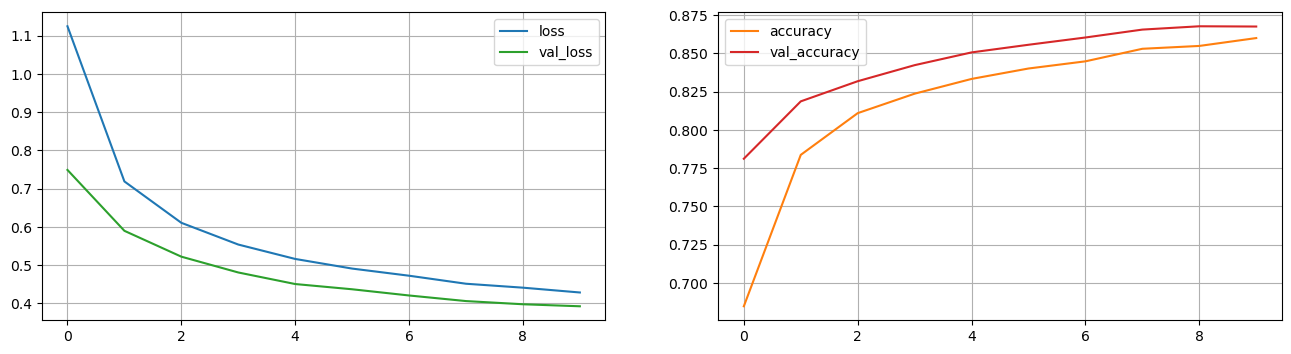

In [47]:
pd.DataFrame(hist).plot(subplots=[('loss', 'val_loss'), ('accuracy', 'val_accuracy')], 
                        layout=(1,2), figsize=(16,4), grid=True)

Finally, let's evaluate the model.

In [48]:
acc = 0.0

model.eval()
for x_batch, y_batch in dl_test:
    pred = model(x_batch)
    acc += (torch.argmax(pred, dim=1) == y_batch).float().sum().item()

acc /= len(dl_test.dataset)
print("Accuracy:", acc)

Accuracy: 0.8573


which is a sizable improvement over the previous model.

I'll leave it up to you to try a different optimizer with and without a learning rate strategy.